In [ ]:
pip install anndata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.1 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=de3a257c115f725bd899f50eb4a807ebeca98cb7f0fb784795edaba9886fe79f
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


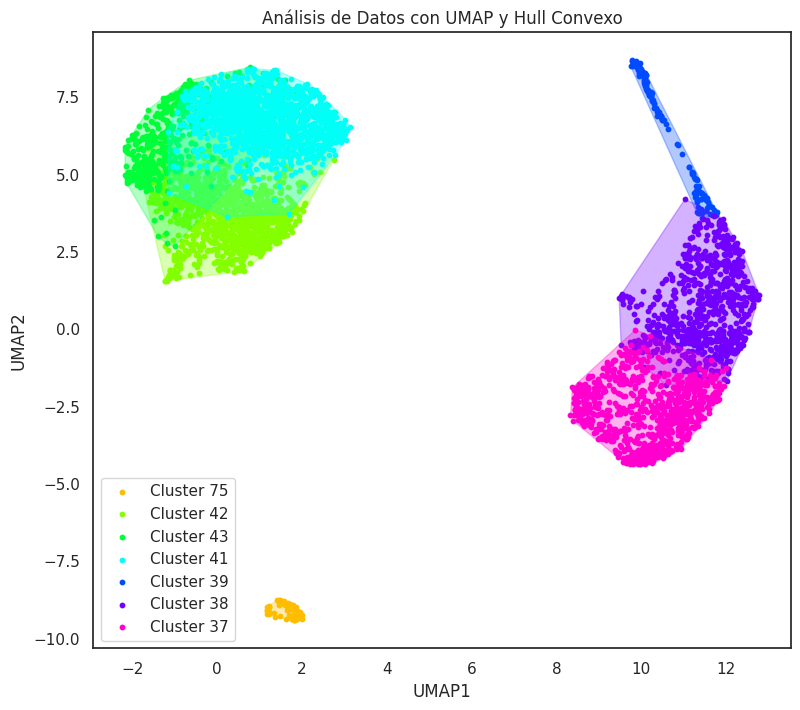

In [ ]:
'''
Código para plotear la UMAP con los clusters de los datos
usando el conjunto de datos .h5ad. Además, se plotea el convex hull
de cada cluster, se colorea según el cluster y se sobreponen poligonos
con el convex hull de cada cluster.
'''

#Librerias a utilizar
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial import ConvexHull
import scanpy as sc

#Cargar datos
file_path = '/content/drive/MyDrive/CodigosAnalisisAlgoritmos/dataset.h5ad'
adata = ad.read_h5ad(file_path)

#Obtener coordenadas UMAP y etiquetas de los clusters
umap_cord = adata.obsm['X_UMAP']
clusterid = adata.obs['cluster_id']

#Configuración de colores para los clusters
sns.set(style="white")
palette = sns.color_palette('hsv', len(clusterid.unique()))

plt.figure(figsize=(9, 8))

#Calcular y plotear convex hull
for i, cluster in enumerate(clusterid.unique()):
    points = umap_cord[clusterid == cluster]

    if len(points) >= 3:
        hull = ConvexHull(points)
        hull_points = points[hull.vertices]

        #Graficar convex hull
        plt.fill(hull_points[:, 0], hull_points[:, 1], color=palette[i], alpha=0.3)

    #Graficar los puntos UMAP
    plt.scatter(points[:, 0], points[:, 1], color=palette[i], label=f'Cluster {cluster}', s=10)

#Título y etiquetas
plt.title('Análisis de Datos con UMAP y Hull Convexo')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.show()
